In [45]:
import os
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.dataloader import DataLoader

import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid

In [5]:
data_dir_train = "/kaggle/input/yoga-16/train"
data_dir_test = "/kaggle/input/yoga-16/test"
data_dir_val = "/kaggle/input/yoga-16/val"

In [18]:
folder_names_train = os.listdir(data_dir_train)
folder_names_test = os.listdir(data_dir_test)
folder_names_val = os.listdir(data_dir_val)


In [19]:
def class_count(data_dir, folder_names):
    
    classes = {}

    for folder_name in folder_names:
        file_dirs = os.path.join(data_dir, folder_name)
        file_names= os.listdir(file_dirs)
        classes[folder_name] = len(file_names)
        
    return classes

In [20]:
classes_train = class_count(data_dir_train, folder_names_train)
classes_test = class_count(data_dir_test, folder_names_test)
classes_val = class_count(data_dir_val, folder_names_val)

In [10]:
classes_train

{'tree_pose': 56,
 'downward-facing_dog_pose': 56,
 'goddess_pose': 56,
 'low_lunge_pose': 55,
 'warrior_1_pose': 56,
 'staff_pose': 56,
 'warrior_2_pose': 56,
 'dolphin_plank_pose': 56,
 'seated_forward_bend_pose': 52,
 'lord_of_the_dance_pose': 56,
 'warrior_3_pose': 50,
 'side_plank_pose': 56,
 'locust_pose': 65,
 'fish_pose': 55,
 'wide-angle_seated_forward_bend_pose': 55,
 'chair_pose': 48}

In [21]:
classes_test

{'tree_pose': 15,
 'downward-facing_dog_pose': 16,
 'goddess_pose': 15,
 'low_lunge_pose': 16,
 'warrior_1_pose': 16,
 'staff_pose': 16,
 'warrior_2_pose': 15,
 'dolphin_plank_pose': 16,
 'seated_forward_bend_pose': 15,
 'lord_of_the_dance_pose': 16,
 'warrior_3_pose': 15,
 'side_plank_pose': 15,
 'locust_pose': 15,
 'fish_pose': 15,
 'wide-angle_seated_forward_bend_pose': 16,
 'chair_pose': 16}

In [22]:
classes_val

{'tree_pose': 8,
 'downward-facing_dog_pose': 8,
 'goddess_pose': 8,
 'low_lunge_pose': 8,
 'warrior_1_pose': 8,
 'staff_pose': 7,
 'warrior_2_pose': 8,
 'dolphin_plank_pose': 8,
 'seated_forward_bend_pose': 8,
 'lord_of_the_dance_pose': 8,
 'warrior_3_pose': 8,
 'side_plank_pose': 8,
 'locust_pose': 8,
 'fish_pose': 8,
 'wide-angle_seated_forward_bend_pose': 8,
 'chair_pose': 8}

In [25]:
def plot_dataset(classes, title):
    plt.figure(figsize=(10, 8))
    plt.bar(classes.keys(), classes.values())
    plt.xlabel("Class")
    plt.ylabel("Number of Images")
    plt.xticks(rotation=45, ha="right")
    plt.title(title)
    plt.tight_layout()

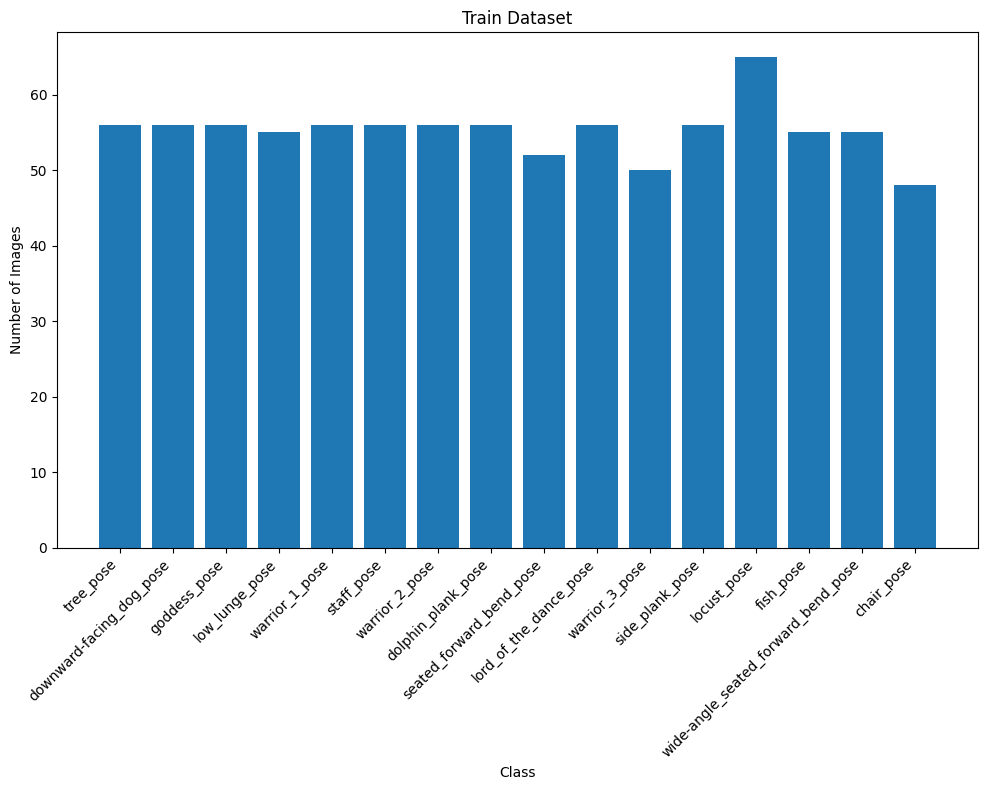

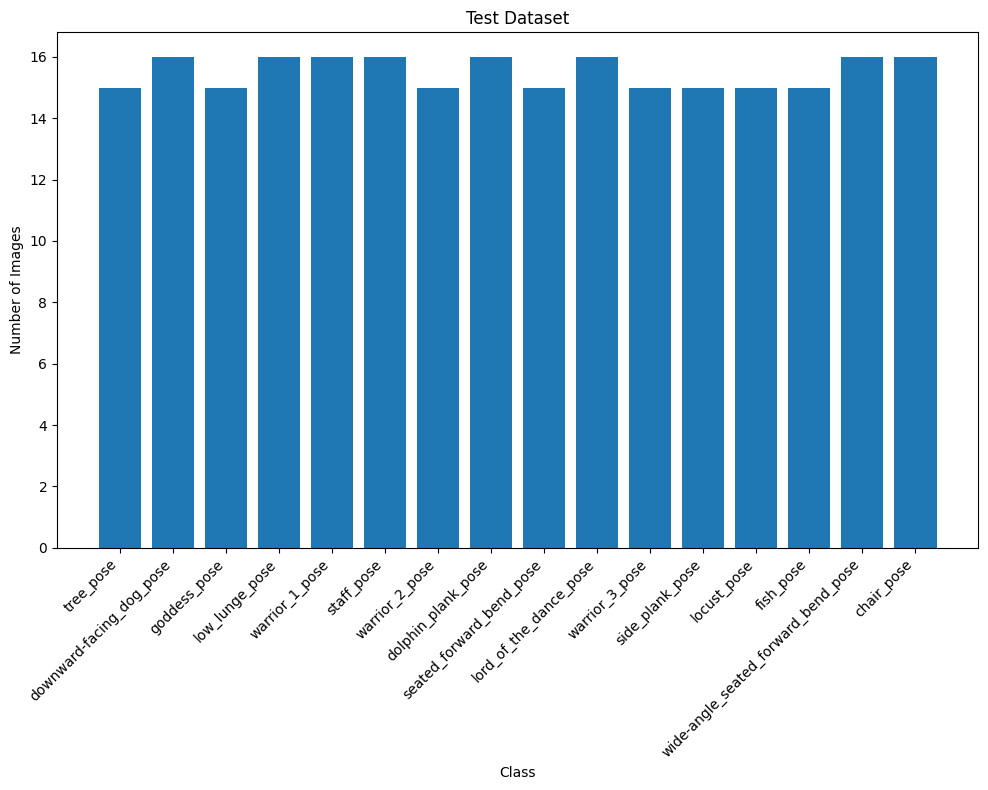

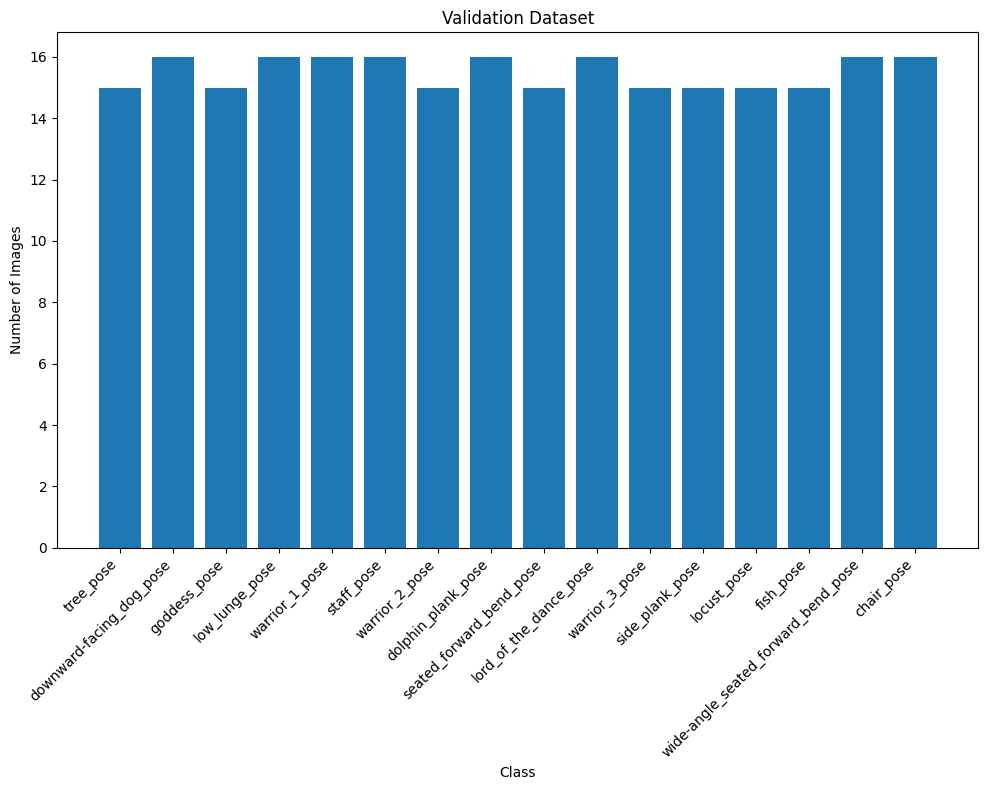

In [27]:
plot_dataset(classes_train, title="Train Dataset")
plot_dataset(classes_test, title="Test Dataset")
plot_dataset(classes_test, title="Validation Dataset")

In [121]:
transformations = transforms.Compose([transforms.Resize((128, 128)),
                                      #transforms.RandomHorizontalFlip(p=0.5),     # 50% chance to flip the image horizontally
                                      #transforms.RandomVerticalFlip(p=0.5),       # 50% chance to flip the image vertically
                                      #transforms.RandomRotation(degrees=15),      # Randomly rotate the image by up to 15 degrees
                                      #transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1), # Adjust brightness, contrast, saturation, and hue
                                      #transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # Random translation by up to 10% of the image size
                                      transforms.ToTensor()])

train_ds = ImageFolder(data_dir_train, transform=transformations)
test_ds = ImageFolder(data_dir_test, transform=transformations)
val_ds = ImageFolder(data_dir_val, transform=transformations)

In [122]:
len(train_ds), len(test_ds), len(val_ds)

(884, 248, 127)

In [123]:
def show_image(image, label, dataset):
    print(f"Label: {dataset.classes[label]} | Class: {label}")
    plt.imshow(image.permute(1, 2, 0))

Label: chair_pose | Class: 0


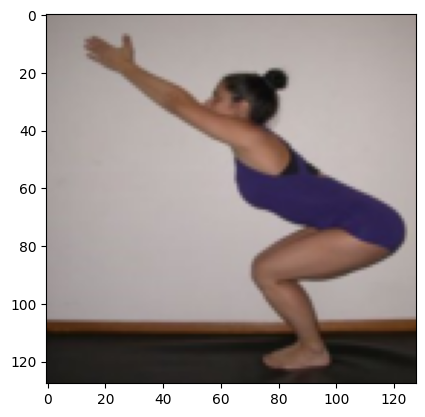

In [124]:
image, label = train_ds[20]
show_image(image, label, train_ds)

Label: chair_pose | Class: 0


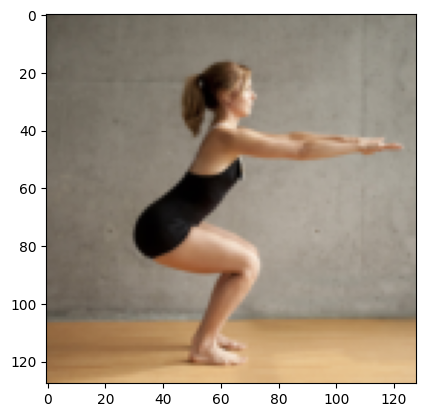

In [125]:
image, label = train_ds[2]
show_image(image, label, train_ds)

Label: dolphin_plank_pose | Class: 1


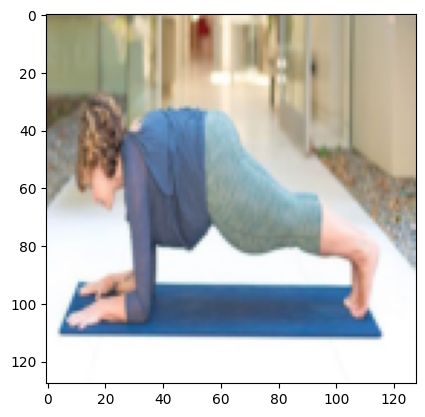

In [126]:
image, label = train_ds[100]
show_image(image, label, train_ds)

In [127]:
BATCH = 32

train_dl = DataLoader(train_ds, BATCH, shuffle=True)
test_dl = DataLoader(test_ds, BATCH)
val_dl = DataLoader(val_ds, BATCH)

In [128]:
num_classes = len(train_ds.classes)
num_classes

16

In [129]:
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=8).permute(1, 2, 0))
        
        break

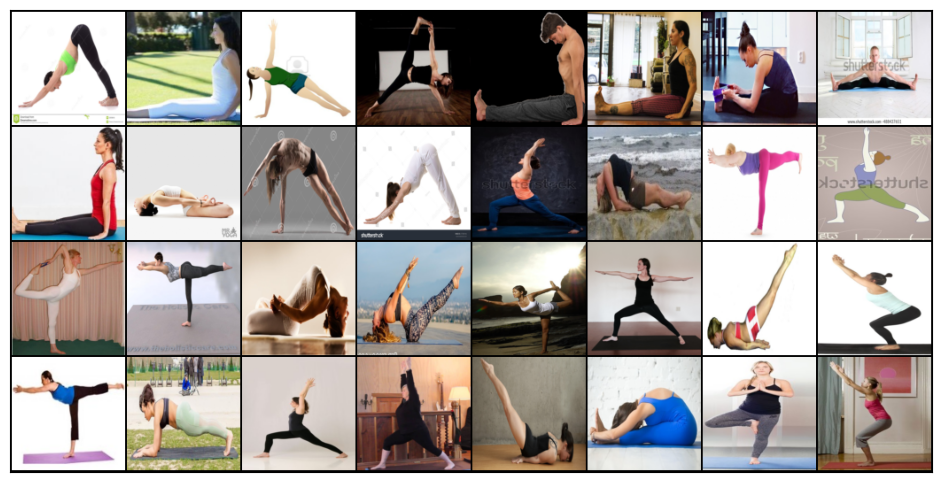

In [130]:
show_batch(train_dl)

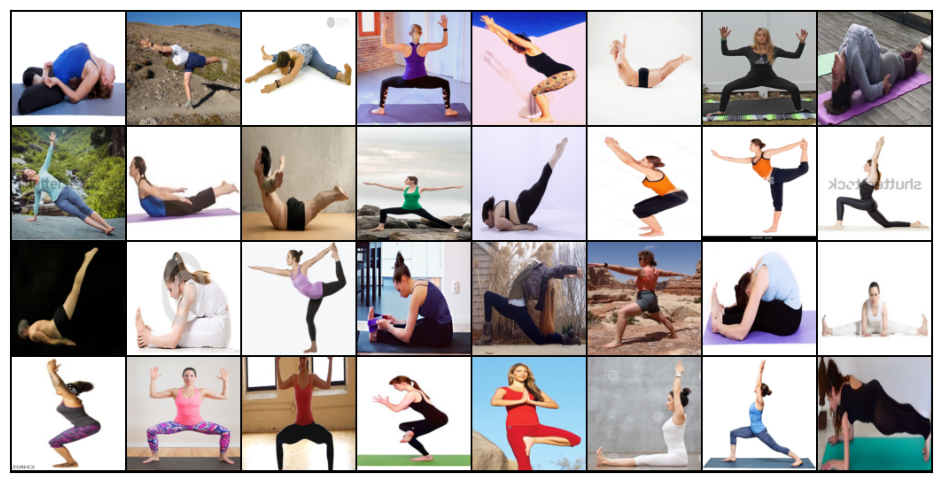

In [131]:
show_batch(train_dl)

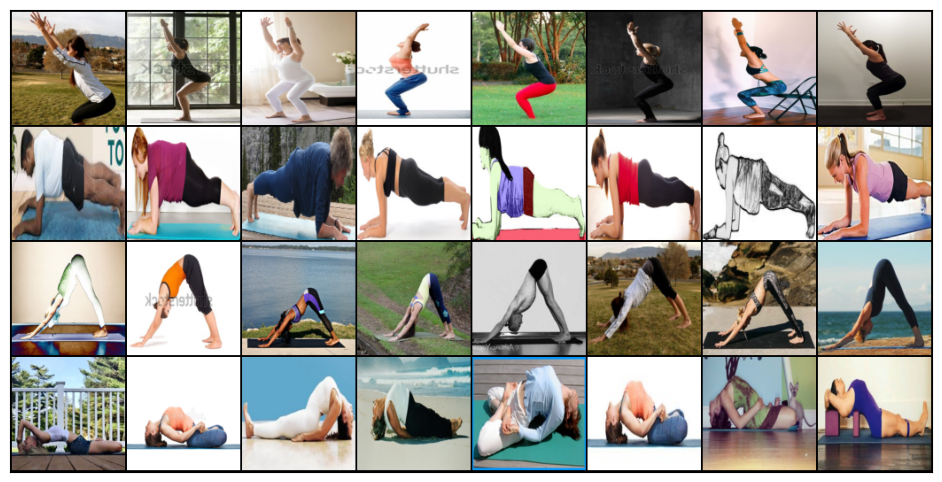

In [132]:
show_batch(val_dl)

## CNN

In [133]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        self.fc1 = nn.Linear(256 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, num_classes)
        
        self.dropput = nn.Dropout(0.5)
        
    def forward(self, x):
        x = self.maxpool1(F.relu(self.conv1(x)))
        #print(x.shape)
        x = self.maxpool1(F.relu(self.conv2(x)))
        #print(x.shape)
        x = self.maxpool1(F.relu(self.conv3(x)))
        #print(x.shape)
        x = self.maxpool1(F.relu(self.conv4(x)))
        #print(x.shape)
        x = x.view(-1, 256 * 8 * 8)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.dropput(x)
        x = self.fc3(x)
        x = self.fc4(x)
        x = self.fc5(x)
       
        return x

In [134]:
from torch.optim.lr_scheduler import StepLR

cnn_model = CNN()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn_model.parameters(),
                            lr=1e-3)
scheduler = StepLR(optimizer, step_size=4, gamma=0.1)

In [135]:
EPOCHS = 12

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, scheduler):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    
    train_losses = []
    val_losses = []
    val_accs = []
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * images.size(0)
        
        epoch_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_loss)
        
        model.eval()
        correct = 0
        running_loss_val = 0.0
        
        with torch.inference_mode():
            for images, labels in val_loader:
                images = images.to(device)
                labels = labels.to(device)
                
                outputs = model(images)
                loss = criterion(outputs, labels)
                running_loss_val += loss.item() * images.size(0)
                
                _, preds = torch.max(outputs, 1)
                correct += torch.sum(preds == labels.data)
                
        val_loss = running_loss_val / len(val_loader.dataset)
        val_acc = correct.double() / len(val_loader.dataset)
        val_losses.append(val_loss)
        val_accs.append(val_acc)
        
        scheduler.step()
        
        print(f"----- Epoch {epoch+1}/{num_epochs} -----")
        print(f"Training Loss: {epoch_loss:.4f}")
        print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}\n')
    
    return model, train_losses, val_losses, val_accs

In [136]:
trained_cnn, train_losses_cnn, val_losses_cnn, val_accs_cnn = train_model(cnn_model, train_dl, val_dl, criterion, optimizer, EPOCHS, scheduler)

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


----- Epoch 1/12 -----
Training Loss: 2.7780
Validation Loss: 2.7724, Validation Accuracy: 0.0630

----- Epoch 2/12 -----
Training Loss: 2.6785
Validation Loss: 2.2955, Validation Accuracy: 0.2598

----- Epoch 3/12 -----
Training Loss: 2.2236
Validation Loss: 1.9960, Validation Accuracy: 0.2913

----- Epoch 4/12 -----
Training Loss: 1.9079
Validation Loss: 1.6671, Validation Accuracy: 0.4567

----- Epoch 5/12 -----
Training Loss: 1.5526
Validation Loss: 1.5418, Validation Accuracy: 0.4961

----- Epoch 6/12 -----
Training Loss: 1.4147
Validation Loss: 1.4665, Validation Accuracy: 0.5197

----- Epoch 7/12 -----
Training Loss: 1.3741
Validation Loss: 1.4406, Validation Accuracy: 0.5433

----- Epoch 8/12 -----
Training Loss: 1.3416
Validation Loss: 1.4223, Validation Accuracy: 0.5591

----- Epoch 9/12 -----
Training Loss: 1.3018
Validation Loss: 1.4188, Validation Accuracy: 0.5748

----- Epoch 10/12 -----
Training Loss: 1.2848
Validation Loss: 1.4092, Validation Accuracy: 0.5906

----- Epo

In [137]:
def evaluate_model(model, test_loader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()
    
    correct = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            correct += torch.sum(preds == labels.data)
    
    accuracy = correct.double() / len(test_loader.dataset)
    
    return accuracy

In [138]:
test_acc_cnn = evaluate_model(trained_cnn, test_dl)
print(f"Test Accuracy CNN: {test_acc_cnn:.4f}")

Test Accuracy CNN: 0.5524


## Resnet50

In [139]:
resnet_model = models.resnet50(pretrained=True)

for params in resnet_model.parameters():
    params.require_grad=False
    
resnet_model.fc = nn.Linear(resnet_model.fc.in_features, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet_model.fc.parameters(),
                            lr=1e-3)
schduler = StepLR(optimizer, step_size=3, gamma=0.1)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [140]:
trained_resnet, train_losses_resnet, val_losses_resnet, val_accs_resnet = train_model(resnet_model, train_dl, val_dl, criterion, optimizer, EPOCHS, scheduler)

----- Epoch 1/12 -----
Training Loss: 2.4356
Validation Loss: 1.8895, Validation Accuracy: 0.5276

----- Epoch 2/12 -----
Training Loss: 1.4334
Validation Loss: 1.5052, Validation Accuracy: 0.6220

----- Epoch 3/12 -----
Training Loss: 1.0726
Validation Loss: 1.3008, Validation Accuracy: 0.6142

----- Epoch 4/12 -----
Training Loss: 0.8616
Validation Loss: 1.2353, Validation Accuracy: 0.5984

----- Epoch 5/12 -----
Training Loss: 0.6859
Validation Loss: 1.1169, Validation Accuracy: 0.6614

----- Epoch 6/12 -----
Training Loss: 0.6063
Validation Loss: 1.1102, Validation Accuracy: 0.6299

----- Epoch 7/12 -----
Training Loss: 0.5421
Validation Loss: 1.0549, Validation Accuracy: 0.6614

----- Epoch 8/12 -----
Training Loss: 0.4557
Validation Loss: 1.0510, Validation Accuracy: 0.6535

----- Epoch 9/12 -----
Training Loss: 0.4177
Validation Loss: 1.0333, Validation Accuracy: 0.6772

----- Epoch 10/12 -----
Training Loss: 0.3802
Validation Loss: 1.0016, Validation Accuracy: 0.6850

----- Epo

In [141]:
test_acc_resnet = evaluate_model(trained_resnet, test_dl)
print(f"Test Accuracy Resnet: {test_acc_resnet:.4f}")

Test Accuracy Resnet: 0.7218


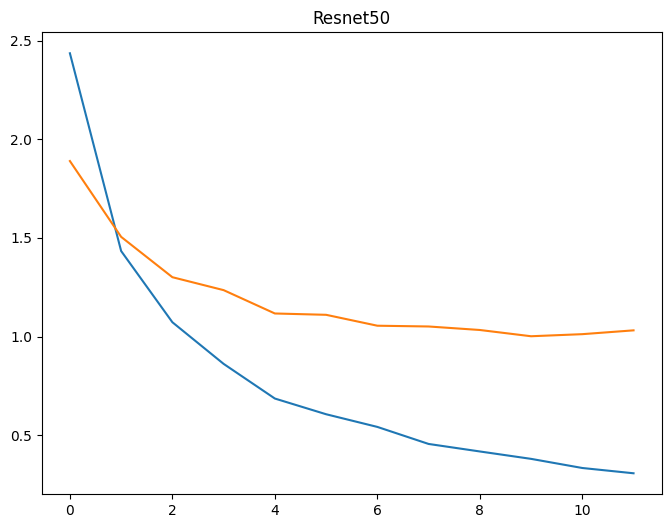

In [142]:
plt.figure(figsize=(8, 6))
plt.plot(train_losses_resnet, label="Train Loss")
plt.plot(val_losses_resnet, label="Validation Loss")
plt.title("Resnet50")
plt.show()

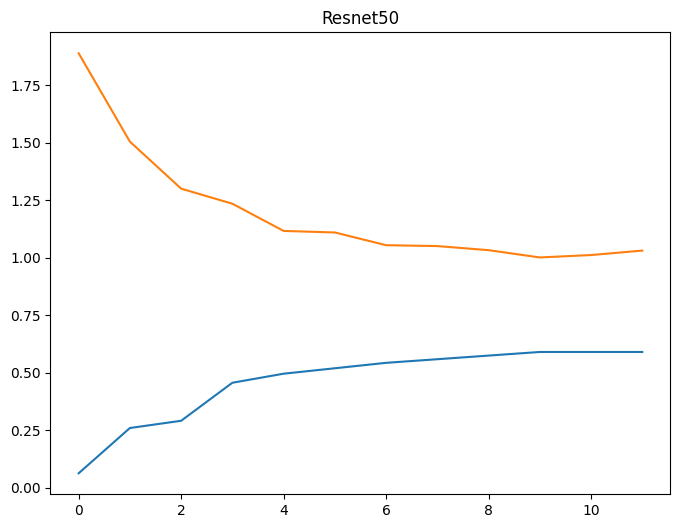

In [143]:
plt.figure(figsize=(8, 6))
plt.plot([acc.cpu() for acc in val_accs_cnn], label="Validation Accuracy")
plt.plot(val_losses_resnet, label="Validation Loss")
plt.title("Resnet50")
plt.show()

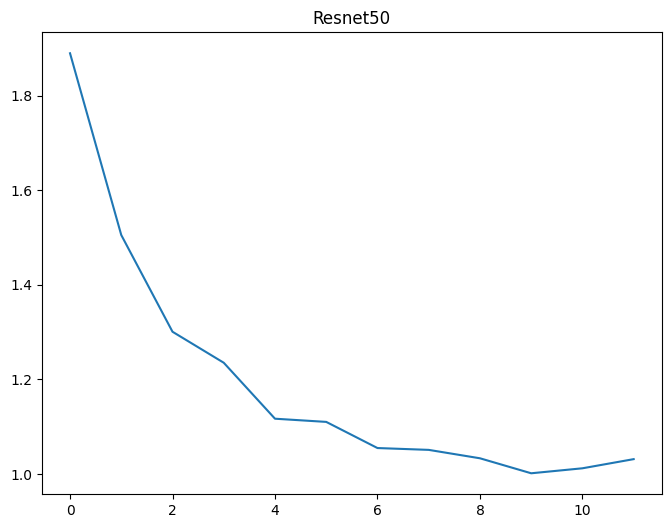

In [144]:
plt.figure(figsize=(8, 6))
#plt.plot([acc.cpu() for acc in val_accs_cnn], label="Validation Accuracy")
plt.plot(val_losses_resnet, label="Validation Loss")
plt.title("Resnet50")
plt.show()

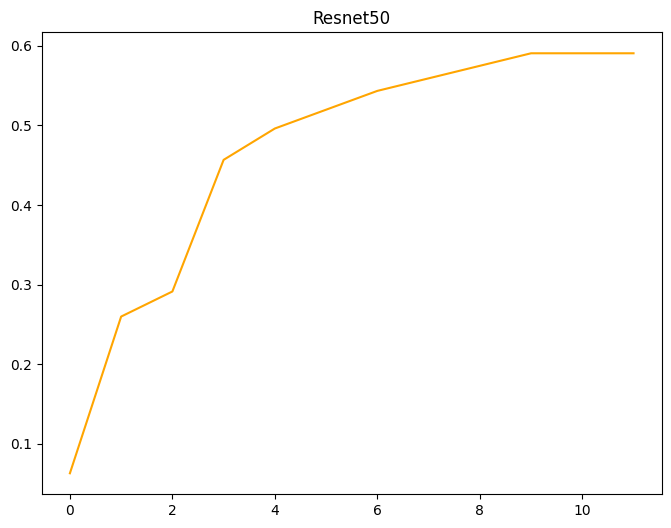

In [145]:
plt.figure(figsize=(8, 6))
plt.plot([acc.cpu() for acc in val_accs_cnn], label="Validation Accuracy", color="orange")
#plt.plot(val_losses_resnet, label="Validation Loss")
plt.title("Resnet50")
plt.show()

## Mobilenet

In [146]:
mobilenet_model = models.mobilenet_v2(pretrained=True)

for params in mobilenet_model.parameters():
    params.require_grad=False

mobilenet_model.classifier[-1] = nn.Linear(mobilenet_model.classifier[-1].in_features, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mobilenet_model.classifier[-1].parameters(),
                            lr=1e-3)
scheduler = StepLR(optimizer, step_size=3, gamma=0.1)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [147]:
trained_mobilenet, train_losses_mobilenet, val_losses_mobilenet, val_accs_mobilenet = train_model(mobilenet_model, train_dl, val_dl, criterion, optimizer, EPOCHS, scheduler)

----- Epoch 1/12 -----
Training Loss: 2.3876
Validation Loss: 1.9264, Validation Accuracy: 0.5118

----- Epoch 2/12 -----
Training Loss: 1.4790
Validation Loss: 1.5553, Validation Accuracy: 0.5276

----- Epoch 3/12 -----
Training Loss: 1.0885
Validation Loss: 1.2940, Validation Accuracy: 0.6220

----- Epoch 4/12 -----
Training Loss: 0.9090
Validation Loss: 1.2436, Validation Accuracy: 0.6614

----- Epoch 5/12 -----
Training Loss: 0.8491
Validation Loss: 1.2266, Validation Accuracy: 0.6614

----- Epoch 6/12 -----
Training Loss: 0.8531
Validation Loss: 1.2125, Validation Accuracy: 0.6535

----- Epoch 7/12 -----
Training Loss: 0.8075
Validation Loss: 1.2070, Validation Accuracy: 0.6693

----- Epoch 8/12 -----
Training Loss: 0.8268
Validation Loss: 1.2054, Validation Accuracy: 0.6693

----- Epoch 9/12 -----
Training Loss: 0.8134
Validation Loss: 1.1998, Validation Accuracy: 0.6535

----- Epoch 10/12 -----
Training Loss: 0.8199
Validation Loss: 1.2125, Validation Accuracy: 0.6535

----- Epo

In [148]:
test_acc_mobilenet = evaluate_model(trained_mobilenet, test_dl)
print(f"Test Accuracy Mobilenet: {test_acc_mobilenet:.4f}")

Test Accuracy Mobilenet: 0.7097


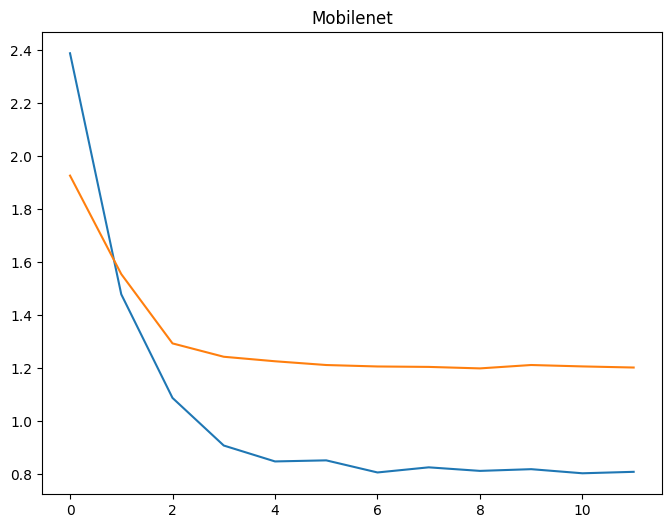

In [149]:
plt.figure(figsize=(8, 6))
plt.plot(train_losses_mobilenet, label="Train Loss")
plt.plot(val_losses_mobilenet, label="Validation Loss")
plt.title("Mobilenet")
plt.show()

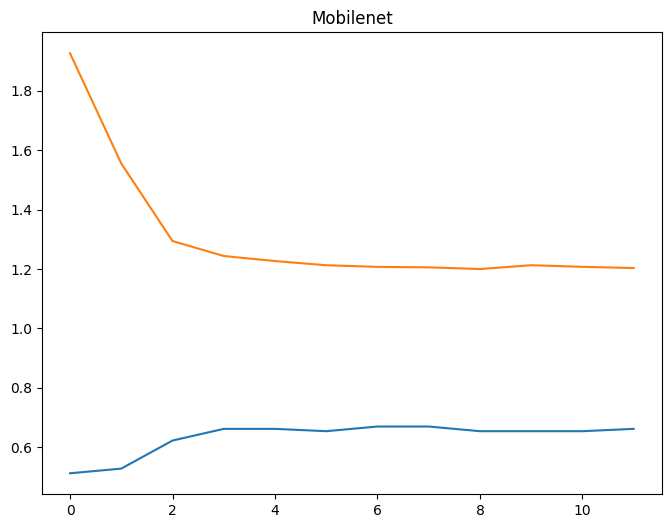

In [150]:
plt.figure(figsize=(8, 6))
plt.plot([acc.cpu() for acc in val_accs_mobilenet], label="Validation Accuracy")
plt.plot(val_losses_mobilenet, label="Validation Loss")
plt.title("Mobilenet")
plt.show()

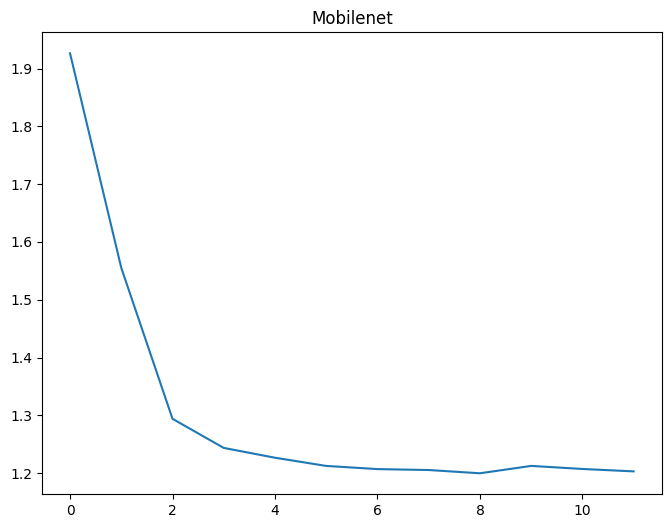

In [151]:
plt.figure(figsize=(8, 6))
#plt.plot([acc.cpu() for acc in val_accs_cnn], label="Validation Accuracy")
plt.plot(val_losses_mobilenet, label="Validation Loss")
plt.title("Mobilenet")
plt.show()

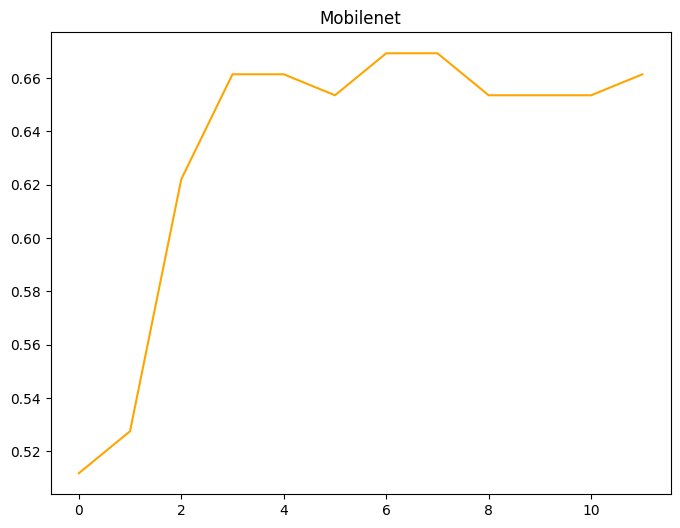

In [152]:
plt.figure(figsize=(8, 6))
plt.plot([acc.cpu() for acc in val_accs_mobilenet], label="Validation Accuracy", color="orange")
#plt.plot(val_losses_resnet, label="Validation Loss")
plt.title("Mobilenet")
plt.show()